In [1]:
#importing all the required libraries-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Step 1: Data understanding and data visualisation:

__Note:__ Our target variable in this dataframe is __'cnt'__ column. Essentially we want to predict the demand for shared bikes.

In [2]:
#Importing the csv file-

bike=pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
#Let's have a quick look at the shape of our DataFrame-
bike.shape

(730, 16)

### *i). Dropping the unwanted columns:*

In [4]:
irrelevant_cols=['dteday','instant','atemp','casual','registered']
bike.drop(irrelevant_cols, axis=1, inplace=True)

In [5]:
#Getting to know the Dtypes and looking if there are any null values in our DataFrame-
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(8)
memory usage: 62.9 KB


- As seen from the above information, all our features seem to have the approptiate data type and we donn't seem to have any null values as well. Good to go ahead.

In [6]:
#Lets have a quick look at the summary of our dataframe-
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,97.250000,34.000021,8714.000000


### *ii). Encoding the required categorical variables with appropriate names:*
Cat vars with numeric values-[season, mnth, weekday, weathersit] Let's convert these categorical variables containing numeric values into categorical variables containing categorical identification to make our further work easy.

In [7]:
bike.weekday.unique()

array([6, 0, 1, 2, 3, 4, 5], dtype=int64)

In [8]:
bike['season'] = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike['mnth'] = bike.mnth.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
bike['weekday'] = bike.weekday.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 0:'Sun'})
bike['weathersit'] = bike.weathersit.map({1:'Clear', 2:'Mist', 3:'LightSnow', 4:'HeavyRain'})

In [9]:
#Let's have a look at our modified dataframe again:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


### *iii). Let's have a pairwise look at our dataframe:*

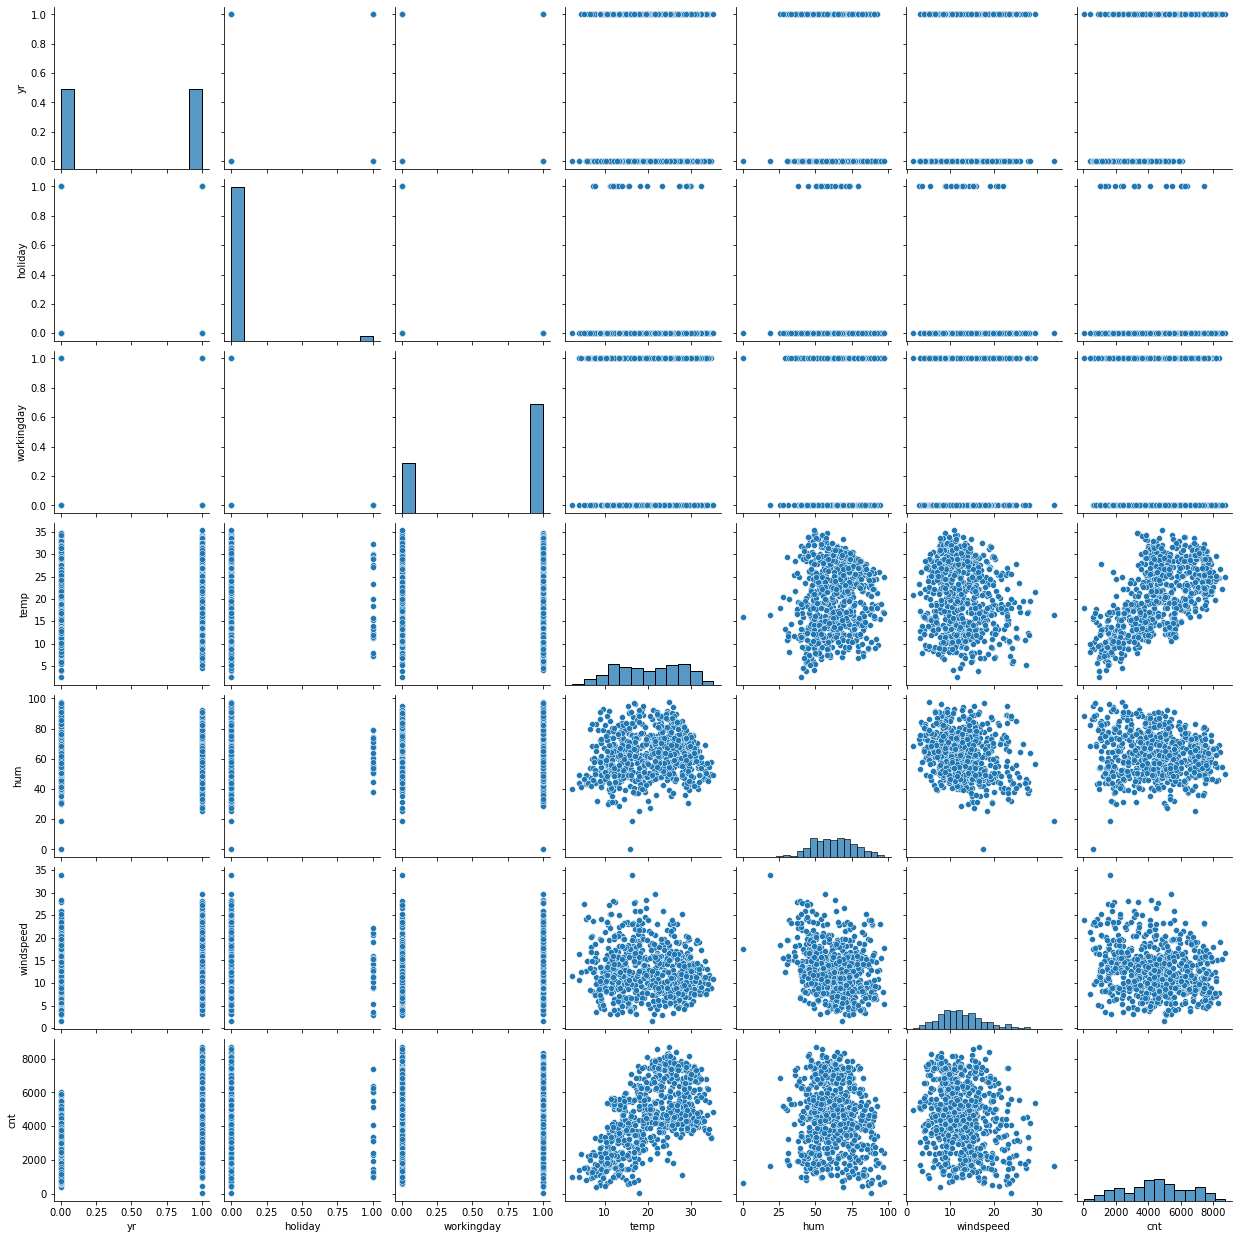

In [10]:
sns.pairplot(bike)
plt.show()

### *iv). Visualising the categorical variables:*

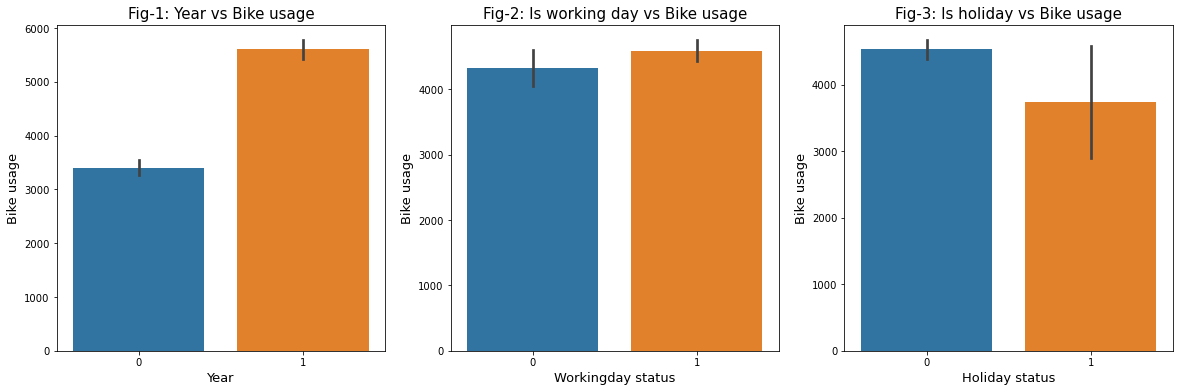

In [11]:
plt.figure(figsize=[20,6])

plt.subplot(1,3,1)
sns.barplot(x='yr', y='cnt', data=bike)
plt.title('Fig-1: Year vs Bike usage', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Bike usage', fontsize=13)

plt.subplot(1,3,2)
sns.barplot(x='workingday', y='cnt', data=bike)
plt.title('Fig-2: Is working day vs Bike usage', fontsize=15)
plt.xlabel('Workingday status', fontsize=13)
plt.ylabel('Bike usage', fontsize=13)

plt.subplot(1,3,3)
sns.barplot(x='holiday', y='cnt', data=bike)
plt.title('Fig-3: Is holiday vs Bike usage', fontsize=15)
plt.xlabel('Holiday status', fontsize=13)
plt.ylabel('Bike usage', fontsize=13)

plt.show()

#### OBSERVATIONS:
- We can see from Fig-1, there is a tremendous amount of increase in the usage of shared bikes from 2018 when there were almost 3500 users to 2019 when there were almost a little more than 5500 users. The demand for shared bikes increased by almost 2000 units in one year.
- From Fig-2, there is a marginal difference in the demand of shared bikes depending upon whether a day is a working day or not.
- From Fig-3, it is apparent that the shared bikes are used more on non-holidays compared to a holidays. The difference is almost of about 1000 users.

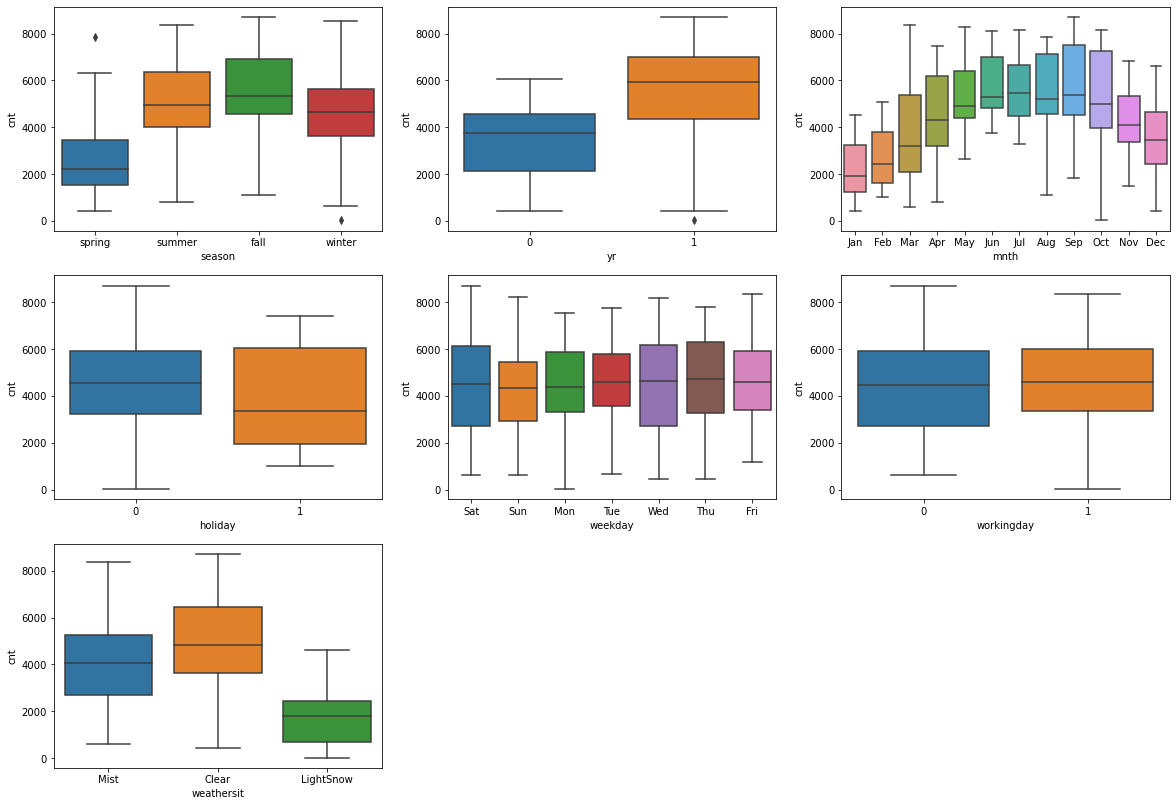

In [12]:
#visualising the categorical variables:
plt.figure(figsize=[20,14])

plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bike)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bike)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bike)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bike)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bike)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bike)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bike)

plt.show()

#### OBSERVATIONS-
From above boxplots, we can see the following observations-
1. The demand for bikes are high in fall season and summer season.
2. The demand for bikes as drastically increased in 2019 as compared to 2018.
3. The demand for bikes is comparatively high in the months of May, June, July, August and September.
4. There is not much difference in the demands of bikes on a holiday or a non-holiday days and nither is there any apparent significant difference on weekends or weekdays.
5. The demand for bikes are more when the weather is clear.

### *v). Let's see the correlations between the variables through heatmap:*

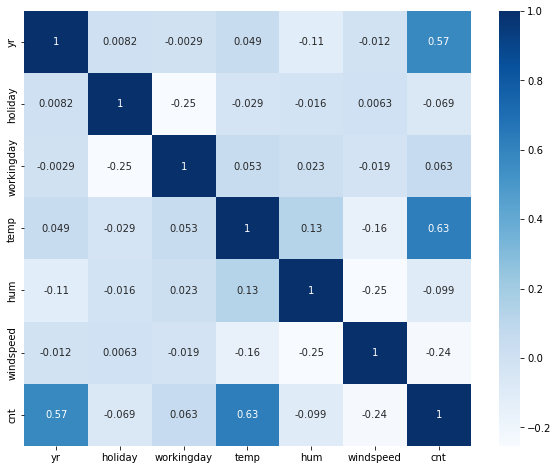

In [13]:
plt.figure(figsize=[10,8])
sns.heatmap(bike.corr(), annot=True, cmap='Blues')
plt.show()

# Step 2: Preparing the data for modeling:
__(train-test spli, rescaling, creating dummy vars, etc)__

- Converting cat vars to dummy vars.
- Train-test split.
- Rescaling.

__1. Converting cat vars to dummy vars:__

In [14]:
#Creating dummy variables- (We don't need all the dummy varaibles because for any categorical variable with 'm' levels, we only need [m-1] dummy variables and hence, implementing the same by droping one dummy variable column.)

seasons = pd.get_dummies(bike.season, drop_first=True)
months = pd.get_dummies(bike.mnth, drop_first=True)
weekdays = pd.get_dummies(bike.weekday, drop_first=True)
weather_sit = pd.get_dummies(bike.weathersit, drop_first=True)

print(seasons.head())
print(months.head())
print(weekdays.head())
print(weather_sit.head())

   spring  summer  winter
0       1       0       0
1       1       0       0
2       1       0       0
3       1       0       0
4       1       0       0
   Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    1    0    0    0    0    0    0    0
1    0    0    0    1    0    0    0    0    0    0    0
2    0    0    0    1    0    0    0    0    0    0    0
3    0    0    0    1    0    0    0    0    0    0    0
4    0    0    0    1    0    0    0    0    0    0    0
   Mon  Sat  Sun  Thu  Tue  Wed
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    1    0    0    0    0    0
3    0    0    0    0    1    0
4    0    0    0    0    0    1
   LightSnow  Mist
0          0     1
1          0     1
2          0     0
3          0     0
4          0     0


In [15]:
#Our dummy vars for various cat columns are stored seperately in a different dataframes(seasons, months, weekdays, weather_sit) which we need to join with our parent dataframe-'bike'.
#Concatenating the dummy dataframes with our 'bike' dataframe-

bike = pd.concat([bike, seasons, months, weekdays, weather_sit], axis=1)

bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
0,spring,0,Jan,0,Sat,0,Mist,14.110847,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,Jan,0,Sun,0,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [16]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'LightSnow',
       'Mist'],
      dtype='object')

In [17]:
#Now, as we have created the dummy variables, we don't need the columns[season, mnth, weekday, weathersit] so we can drop them all:
bike = bike.drop('season', axis=1)
bike = bike.drop('mnth', axis=1)
bike = bike.drop('weekday', axis=1)
bike = bike.drop('weathersit', axis=1)
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:
len(bike.columns)

29

__2. Spliting the data set into train-test set:__

In [19]:
import sklearn
from sklearn.model_selection import train_test_split as tts

### Note: We will use the following terms henceforth:
- 't' for training
- 'T' for Testing

In [20]:
bt, bT = tts(bike, train_size=0.7, random_state=100) #Note:- bt=bike_train, bT=bike_test

print(bt.shape)
print(bT.shape)

(510, 29)
(220, 29)


__3. Rescaling the variables:__
- There are 2 methods by which we can rescale our predictors:
     - MinMax scaling (aka Normalisation): Compress the data between 0 and 1
     - Standardisation: Converts the data with mean=0 and standard deviation=1.

In [21]:
#We will use Normalisation as it handles outliers as well:

from sklearn.preprocessing import MinMaxScaler as mms

In [22]:
# 1. Instiantiate an object:
scaler=mms()

#remember we want to rescale only numeric vars and not binary vars.
#Creating a list of num vars:
num_vars=['temp','hum','windspeed','cnt']

# 2. Fit on training data:
bt[num_vars] = scaler.fit_transform(bt[num_vars])
bt.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.751824,0.380981,0.191095,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
#Confirming the maping of num vars between 0 and 1:
bt[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


All our numeric variables seem to be scaled between 0 and 1. Good to go ahead!

# Step 3: Training the model:

__1. Checking multicollinearity:__

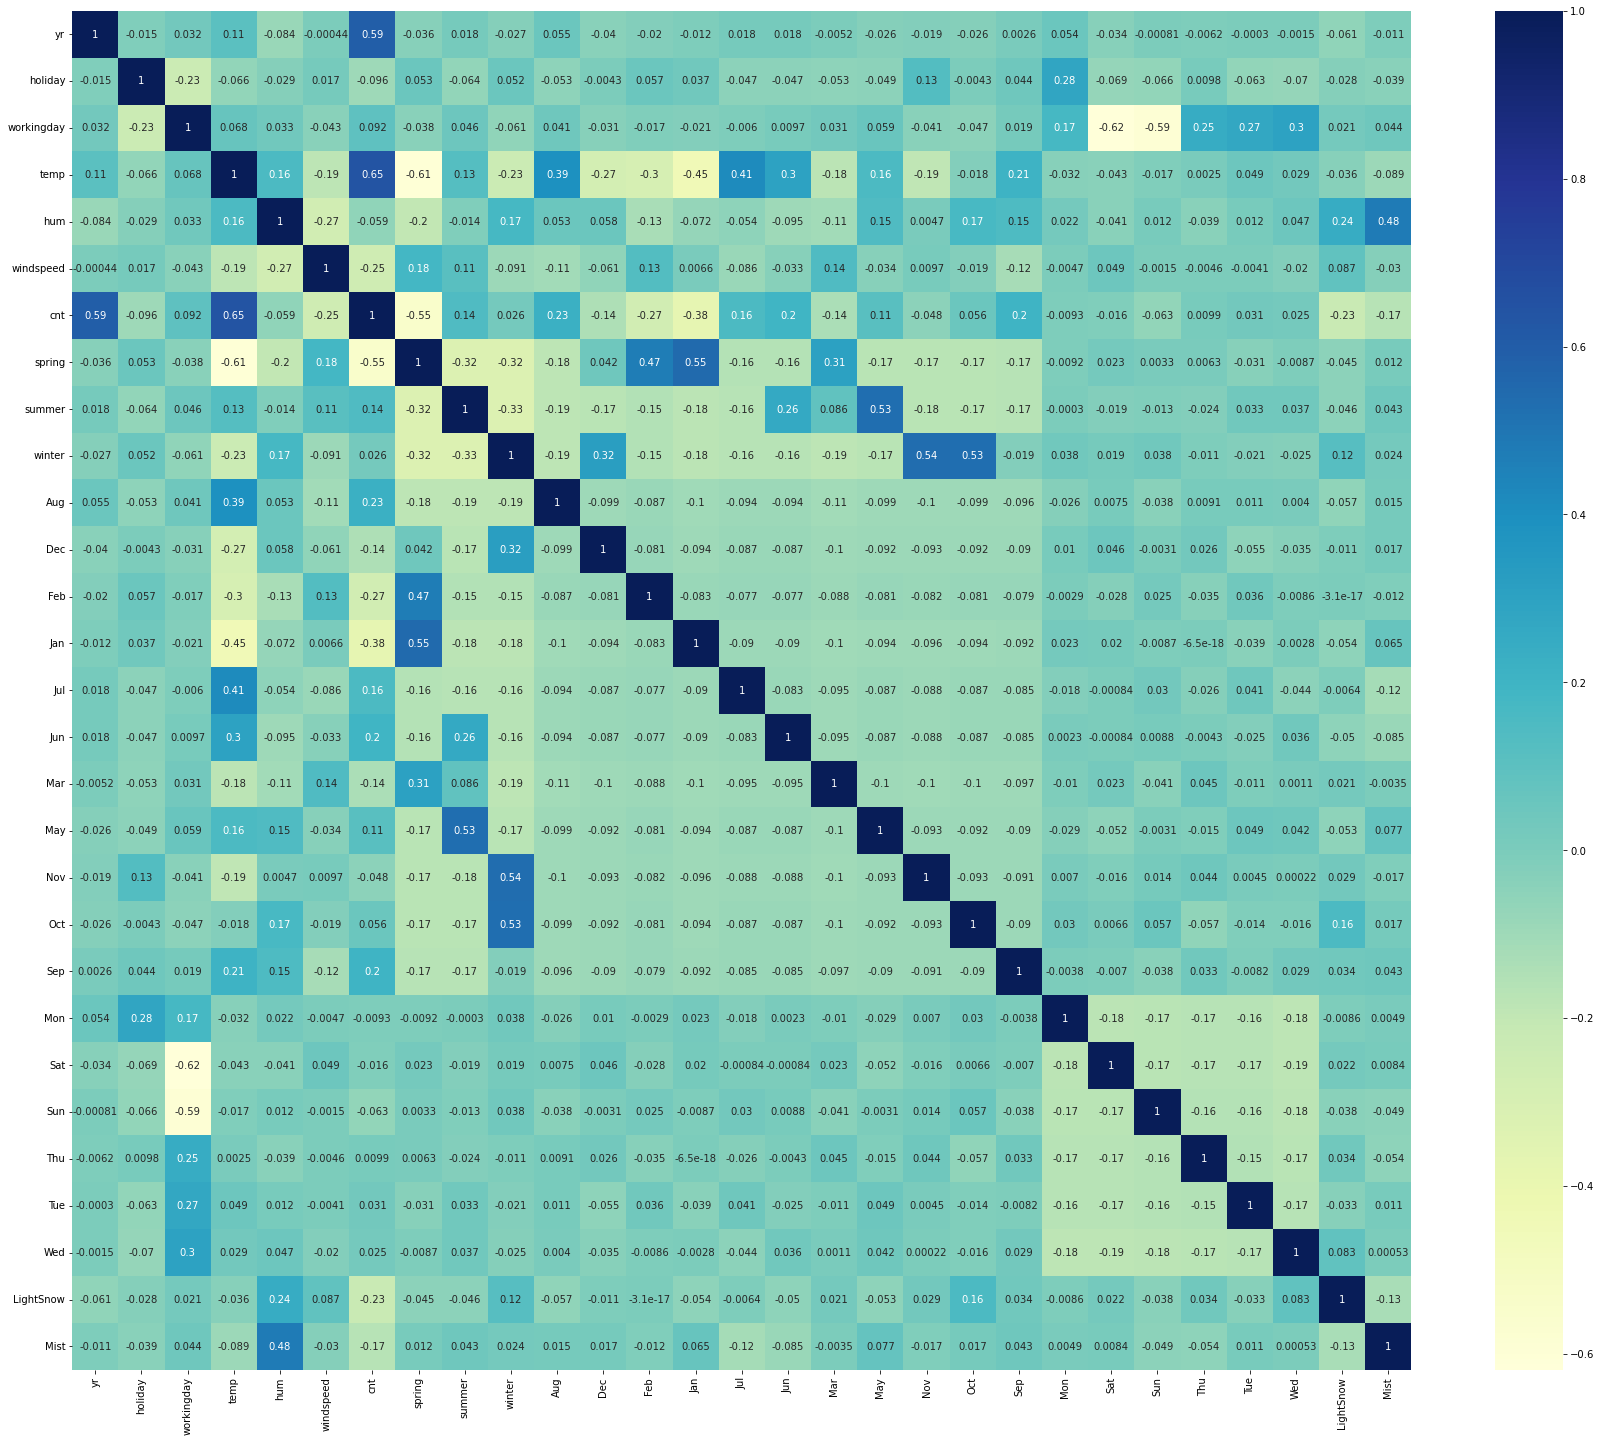

In [24]:
plt.figure(figsize=[30,25])
sns.heatmap(bt.corr(), annot=True, cmap='YlGnBu')
plt.show()

#### OBSERVATIONS:
- We can see that our target variable has more demand when the humidity is high, when the month is August, June and September.
- We can also see that our target variable is little impacted on weather conditions like when it's a light snowfall and also when the weather is little mist.

## Using RFE to build our model:

In [25]:
#importing RFE and LinearRegression:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

__STP 1: Create X&y:__

In [26]:
#Our X-train is all the coloumns apart from the target variable(cnt) and y-train is the target variable(cnt)
#We will use Xt as X_train and yt as y_train.
Xt = bt   
yt = bt.pop('cnt')

- __Note:__  We will build models and look at 2 things:
    - VIF or multicollinearity.
    - Statistical significance of the model or p-values.

In [27]:
#Making our model to learn the train sets:
lr = LinearRegression()
lr.fit(Xt,yt)

rfe = RFE(lr,10)
rfe = rfe.fit(Xt, yt)

In [28]:
#Checking which variables are selected/rejected and ranked by the RFE:
list(zip(Xt.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', False, 5),
 ('Aug', False, 12),
 ('Dec', False, 9),
 ('Feb', False, 10),
 ('Jan', False, 7),
 ('Jul', False, 2),
 ('Jun', False, 15),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 8),
 ('Oct', False, 13),
 ('Sep', False, 4),
 ('Mon', False, 17),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 14),
 ('Wed', False, 18),
 ('LightSnow', True, 1),
 ('Mist', False, 3)]

In [29]:
#Features selected by RFE:
col = Xt.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Sat', 'Sun', 'LightSnow'],
      dtype='object')

In [30]:
#Features rejected by RFE:
Xt.columns[~rfe.support_]

Index(['summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar',
       'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Thu', 'Tue', 'Wed', 'Mist'],
      dtype='object')

#### Building model using statsmodels for a detailed statistical view:

In [31]:
#creating Xtrfe dataframe with variables selected by RFE:

Xtrfe = Xt[col]

#Adding constant because in StatsModels, an intercept is not included by default so we need to add it manually.
import statsmodels.api as sm
Xtrfe = sm.add_constant(Xtrfe)
Xtrfe.head()

,const,yr,holiday,workingday,temp,hum,windspeed,spring,Sat,Sun,LightSnow
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,0
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,1,0,0
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,1,0
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,0
111,1.0,0,0,1,0.345824,0.751824,0.380981,0,0,0,0


In [32]:
#Getting the statistical view of our model:
lr = sm.OLS(yt, Xtrfe).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          7.11e-175
Time:                        04:57:12   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3293      0.024     13.474      0.000       0.281       0.377
yr             0.2318      0.009     26.286      0.000       0.214       0.249
holiday        0.0310      0.023      1.361      0.174      -0.014       0.076
workingday     0.1091      0.010     11.087      0.000       0.090       0.128
temp           0.3908      0.025     15.851      0.000       0.342       0.439
hum           -0.2145      0.033     -6.533      0.000      -0.279      -0.150
windspeed     -0.1978      0.027     -7.233      0.000      -0.251      -0.144
spring        -0.1551      0.013    -11.996      0.000      -0.181      -0.130
Sat            0.1187      0.012      9.750      0.000       0.095       0.143
Sun            0.0705      0.013      5.593      0.000       0.046       0.095
LightSnow     -0.2007      0.027     -7.414      0.000      -0.254      -0.148
==============================================================================
Omnibus:                       49.165   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.947
Skew:                          -0.587   Prob(JB):                     6.56e-21
Kurtosis:                       4.731   Cond. No.                     8.46e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.92e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Computing the VIF as well:
- VIF(Variance Inflation Factor) tells us how much are our features are corrrlated with eachother.
- VIF can be calculated by:
### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [34]:
#Dropping the constant:
Xtrfe = Xtrfe.drop('const', axis=1)

#Creating a new dataframe with all the selected predictors by RFE with their respective VIF values in it:

vif = pd.DataFrame() #crreation of a dataframe with name 'vif'
X = Xtrfe #assigning the value to X with 

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

,Features,VIF
2,workingday,32.66
7,Sat,8.05
8,Sun,7.70
1,holiday,2.14
3,temp,1.63
6,spring,1.62
4,hum,1.21
5,windspeed,1.13
9,LightSnow,1.10
0,yr,1.03


__Now, we will be removing variables that are insignificant (p-values>0.05) and variables that have high VIF values.__

### Variable no.1- workingday:
- workingday looks like it has a very high VIF value of 32.66 which is above the threshold value of VIF(5). So lets drop workingday variable:
- Later, rebuilding the model:

In [35]:
#Dropping workingday:
Xtn1 = Xtrfe.drop('workingday', axis=1) #here, Xtn1 means X train new-1

#Rebuilding the model:
Xtlr1 = sm.add_constant(Xtn1) #here, Xtlr1 means C train linear model-1
lr1 = sm.OLS(yt, Xtlr1).fit()
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     239.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          7.11e-175
Time:                        04:57:12   Log-Likelihood:                 464.41
No. Observations:                 510   AIC:                            -908.8
Df Residuals:                     500   BIC:                            -866.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4384      0.030     14.494      0.000       0.379       0.498
yr             0.2318      0.009     26.286      0.000       0.214       0.249
holiday       -0.0781      0.028     -2.801      0.005      -0.133      -0.023
temp           0.3908      0.025     15.851      0.000       0.342       0.439
hum           -0.2145      0.033     -6.533      0.000      -0.279      -0.150
windspeed     -0.1978      0.027     -7.233      0.000      -0.251      -0.144
spring        -0.1551      0.013    -11.996      0.000      -0.181      -0.130
Sat            0.0096      0.012      0.783      0.434      -0.015       0.034
Sun           -0.0385      0.013     -3.039      0.002      -0.063      -0.014
LightSnow     -0.2007      0.027     -7.414      0.000      -0.254      -0.148
==============================================================================
Omnibus:                       49.165   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.947
Skew:                          -0.587   Prob(JB):                     6.56e-21
Kurtosis:                       4.731   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Dropping the constant:
Xtlr1 = Xtlr1.drop('const', axis=1)

In [37]:
#Calculating VIF values again:

vif = pd.DataFrame()
X = Xtn1

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'], 2)

vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,hum,9.94
2,temp,8.40
4,windspeed,3.91
0,yr,2.03
5,spring,1.79
6,Sat,1.22
7,Sun,1.21
8,LightSnow,1.11
1,holiday,1.04


### Variable no.2- hum (humidity):
- hum(humidity) seem to have a high VIF value of 9.94, which is beyond the threshold value of VIF(5).
- Therefore droping the column-hum:

In [38]:
#Dropping hum:
Xtn2 = Xtlr1.drop('hum', axis=1)

#Rebuilding the model:
Xtlr2 = sm.add_constant(Xtn2)
lr2 = sm.OLS(yt, Xtlr2).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     243.5
Date:                Wed, 11 May 2022   Prob (F-statistic):          3.22e-167
Time:                        04:57:13   Log-Likelihood:                 443.52
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     501   BIC:                            -830.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2844      0.020     14.411      0.000       0.246       0.323
yr             0.2367      0.009     25.895      0.000       0.219       0.255
holiday       -0.0761      0.029     -2.624      0.009      -0.133      -0.019
temp           0.3831      0.026     14.946      0.000       0.333       0.433
windspeed     -0.1503      0.027     -5.479      0.000      -0.204      -0.096
spring        -0.1470      0.013    -10.973      0.000      -0.173      -0.121
Sat            0.0122      0.013      0.951      0.342      -0.013       0.037
Sun           -0.0401      0.013     -3.035      0.003      -0.066      -0.014
LightSnow     -0.2489      0.027     -9.181      0.000      -0.302      -0.196
==============================================================================
Omnibus:                       56.439   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              102.819
Skew:                          -0.676   Prob(JB):                     4.71e-23
Kurtosis:                       4.735   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#Dropping the constant:
Xtlr2 = Xtlr2.drop(['const'],axis=1)

In [40]:
#Calculating VIF values again:

vif = pd.DataFrame()
X = Xtn2

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'], 2)

vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,3.71
2,temp,3.50
0,yr,2.02
4,spring,1.51
5,Sat,1.21
6,Sun,1.19
7,LightSnow,1.05
1,holiday,1.04


### Variable no.3- Sat (Saturday):
- As seen from the latest summary(), all the p-values are in the controlled limit except for the variable-Sat having a p-value of 0.342. Let's drop this variable:

In [41]:
#Dropping Sat:
Xtn3 = Xtlr2.drop('Sat', axis=1)

#Rebuilding the model:
Xtlr3 = sm.add_constant(Xtn3)
lr3 = sm.OLS(yt, Xtlr3).fit()
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     278.2
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.92e-168
Time:                        04:57:13   Log-Likelihood:                 443.06
No. Observations:                 510   AIC:                            -870.1
Df Residuals:                     502   BIC:                            -836.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2870      0.020     14.675      0.000       0.249       0.325
yr             0.2365      0.009     25.881      0.000       0.219       0.254
holiday       -0.0785      0.029     -2.716      0.007      -0.135      -0.022
temp           0.3822      0.026     14.923      0.000       0.332       0.433
windspeed     -0.1492      0.027     -5.444      0.000      -0.203      -0.095
spring        -0.1471      0.013    -10.981      0.000      -0.173      -0.121
Sun           -0.0423      0.013     -3.262      0.001      -0.068      -0.017
LightSnow     -0.2488      0.027     -9.178      0.000      -0.302      -0.196
==============================================================================
Omnibus:                       53.350   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.428
Skew:                          -0.636   Prob(JB):                     2.57e-22
Kurtosis:                       4.750   Cond. No.                         9.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
#Dropping the constant:
Xtlr_final = Xtlr3.drop(['const'],axis=1)

In [43]:
#Calculating VIF values again:

vif = pd.DataFrame()
X = Xtn3

vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] =round(vif['VIF'], 2)

vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
3,windspeed,3.66
2,temp,3.43
0,yr,2.02
4,spring,1.51
5,Sun,1.16
6,LightSnow,1.05
1,holiday,1.03


#### OBSERVATIONS:
- We can see that now all the predictor variables have a p-value less then 0.05 and VIF values below 5.
- We have got the R-square as 79.5%, implying a pretty good relationship between our model and the dependent variable.
- The adjusted R-squared we got is 79.2%.
- This model now seems to be good to go ahead.

# Step 4: Residual analysis (for training set):

In [44]:
#Note:- ['lr3'] is our model after dropping- workingday, hum, and Sat.
#Xtlr3 is our model (with constant) we will move forward with.

In [45]:
Xtlr3

,const,yr,holiday,temp,windspeed,spring,Sun,LightSnow
576,1.0,1,0,0.815169,0.264686,0,0,0
426,1.0,1,0,0.442393,0.255342,1,0,0
728,1.0,1,0,0.245101,0.663106,1,1,0
482,1.0,1,0,0.395666,0.188475,0,0,0
111,1.0,0,0,0.345824,0.380981,0,0,0
...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0
53,1.0,0,0,0.202618,0.111379,1,0,0
350,1.0,0,0,0.248216,0.431816,0,0,0
79,1.0,0,0,0.462664,0.529881,0,0,0


In [46]:
#predicting y on train:
ytp=lr3.predict(Xtlr3)

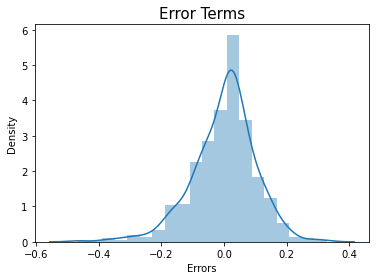

In [47]:
sns.distplot((yt - ytp), bins=20)

plt.title('Error Terms', fontsize = 15) 
plt.xlabel('Errors', fontsize = 10) 
plt.show()

- Error terms seem to have a good bell curve with mean=0. Meaning, the error terms are normally distributed and hence, standing true on the assumption.

# Step 5: Predicting & evaluating the model on test set:

We need to transform the test set as well just like we did for the training set.(Rescaling):

- If we feed the test set with the values of variables that are not MinMaxed scale as training set, the predictions will be incorrect.
- Therefore it is crucial that whatever preprocessing steps we do on the training set, must be done on the test set as well.

In [48]:
#We want to rescale only numeric vars (of test set) and not binary vars.
#Creating a list of num vars:
num_vars=['temp','hum','windspeed','cnt']

# 2. transform on data:
bT[num_vars] = scaler.transform(bT[num_vars])
bT.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [49]:
#Dividing into X-Test & y-Test
yT = bT.pop('cnt')
XT = bT
XT.describe()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,LightSnow,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that some max values are above 1 and some min values are below 0(-ve) as well.
#### Reason-
The min and the max values that the model has learned is for the training set and we have fited the scaler on the training set. And we have only transformed the test set using those MinMax values from the training set. 

In [50]:
#Checking the columns:
Xtn3.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'Sun', 'LightSnow'], dtype='object')

In [51]:
#Making prediction:
XT_n = XT[Xtn3.columns]

#Adding the constant:
XT_n1 = sm.add_constant(XT_n)
XT_n1.head()

,const,yr,holiday,temp,windspeed,spring,Sun,LightSnow
184,1.0,0,1,0.831783,0.084219,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0


###### Predicting:

In [52]:
y_pred = lr3.predict(XT_n1)

##### Finding R^2 for Test set:

In [53]:
from sklearn.metrics import r2_score
r2_score(yT,y_pred)

0.7806208555599167

The R^2 for our test set that we got is 78.06%.

# Step 6: Visualising the model:

Text(0, 0.5, 'y_pred')

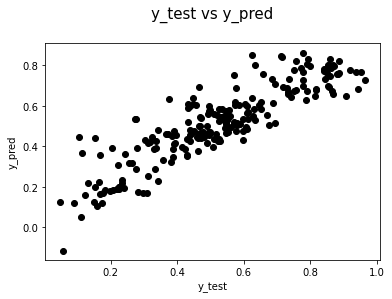

In [54]:
# y-test vs y-pred:
plt.scatter(yT,y_pred,color='black')
plt.title('y_test vs y_pred\n', fontsize=15)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)

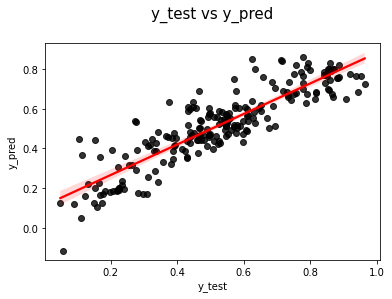

In [55]:
#Regression plot for y-test vs y-pred:

sns.regplot(x=yT, y=y_pred, scatter_kws={"color": "black"}, line_kws={"color": "r"})

plt.title('y_test vs y_pred\n', fontsize=15)
plt.xlabel('y_test', fontsize=10)
plt.ylabel('y_pred', fontsize=10)
plt.show()

## Conclusion:
- The equation of our final model is: (Ypred= B0 + B1.X1 + B2.X2 + ..... + Bn.Xn)


__count__ = (0.2870) + (0.2365 x yr) - (0.0785 x holiday) + (0.3822 x temp) - (0.1492 x windspeed) - (0.1471 x spring) - (0.0423 x Sun) - (0.2488 x LightSnow) 

- The R^2 for our train data set is 79.5% and for test data set, the R^2 is 78.06%. The difference in the test and train R^2 is withing the range of 5% so we can say that our model is a viable one and a good one indeed.

- We can see that the variable temp (temperature) has the highest coefficient of 0.3822. It means that if the temperature increases by 1 unit, then the demand for bikes increases by 0.3822 units.
- We have few negative coefficients as well. The most significant one is the variable-LightSnow, having a coefficient of (-0.2488). This means that if the LightSnow increases by 1 unit, then the demand for bikes decreases by 0.2488 units.

# Business Goals-
##### 1. Consider Year:
- As seen from the variable-yr (year), one thing to notice here is that the demand for bike seems to be increasing drastically as the year passes. From the year 2018 to 2019, the demand of BoomBikes increased by almost 2000 units. More people are getting to know about the shared bikes and this may increase in comming years as well.

##### 2. Consider Temperature:
- Also, the temperature seems to be impacting the demand for shared bikes more which is very obvious because as the temperature or we can say when the weather is clear, more people will be using the BoomBikes.

##### 3. Consider Weather:
- The demand for bikes or we can say that the provision of bikes for various users can be easily manipulated according to the weather conditions as well. For example- In clear weather, people tend to use shared bikes more, followed by mist weather. When the weather is little snowy or windy, very less amount of BoomBikes are used. Proving appropriate number of bikes on docking station would help in various factors like low maintainance, less chances of bikes getting damaged by weather conditions ultimately resulting in cost saving. 

##### 4. Consider Season:
- The season of spring has a negative impact on the use of BoomBikes. A good factor to understand and manage the supply of bikes for the company BoomBikes.

##### 5. Consider Holidays and Sundays:
- Surprisingly, on the days off or on Sundays, people tend to use less shared bikes as it has a negative impact according to our predictions. This may be because people on holidays would like to use their own vehicles and travel along with their family and friends rather then using BoomBikes.